In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random
data = np.load('/content/mineral-spectra_denoised.npz', allow_pickle=True)
original_data = data['spectra']

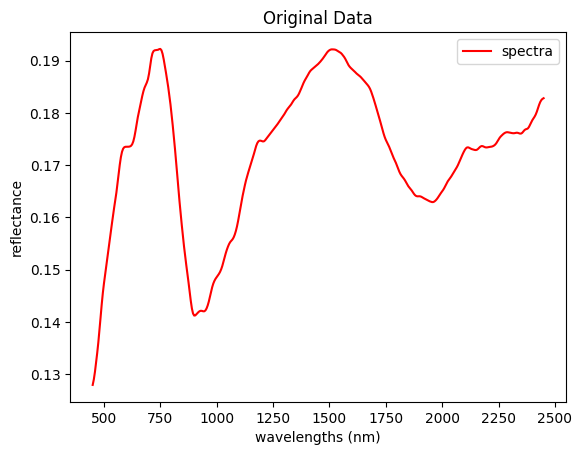

In [ ]:
mean = 0
std_deviation = 25
#adding seed
rnd_seed = 42
rng = np.random.default_rng(seed=rnd_seed)
#change 0.0001 to 0.0001
gaussian_noise = 0.0001 * rng.normal(mean, std_deviation, original_data.shape)
#gaussian_noisy_data = original_data + np.random.normal(mean, std_deviation, original_data.shape)
# Add Poisson noise
lambda_value = 10
#change 0.001 to 0.0001
poisson_noise =  0.001 * (rng.poisson(lambda_value, original_data.shape) - lambda_value)
#poisson_noisy_data = np.random.poisson(lambda_value, original_data.shape)

plt.plot(data['wavelengths'], original_data[100].T, color='red', label='spectra')
plt.xlabel('wavelengths (nm)')
plt.ylabel('reflectance')
plt.title('Original Data')
plt.legend()
plt.show()

Combining Noise

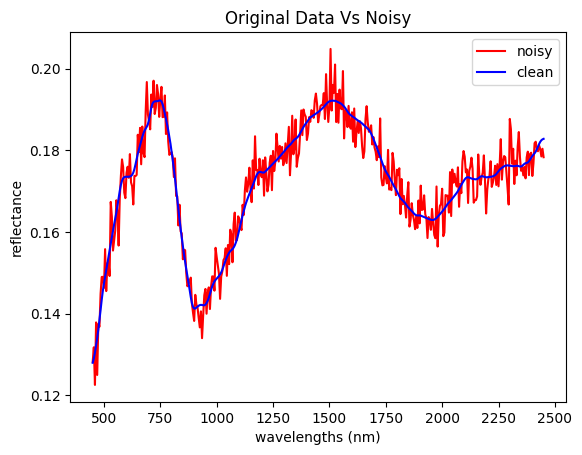

In [ ]:
# combining two noise
noisy_data = original_data + gaussian_noise + poisson_noise
# save the noisy data to a new .npz file
np.savez('noisy_data.npz', data_n=noisy_data)
lables = data['spectra']
plt.plot(data['wavelengths'], noisy_data[100].T, color='red', label='noisy')
plt.plot(data['wavelengths'], lables[100].T, color='blue', label='clean')
plt.xlabel('wavelengths (nm)')
plt.ylabel('reflectance')
plt.title('Original Data Vs Noisy')
plt.legend()

In [ ]:
rnd_seed = 42
rng = np.random.default_rng(seed=rnd_seed)
num_samples = 674
input_length = 401
X = np.random.random((num_samples, input_length , 1))  # Example input data
#y = np.sin(np.linspace(0, 10, input_length)) + np.random.normal(0, 0.2, num_samples)  # Example output data
# Splitting the data into training, validation, and test sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(noisy_data, lables, test_size=0.2, random_state=42)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(noisy_data, lables, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2 / (1-0.2), random_state=42)

index_train, index_test, _, _ = train_test_split(np.arange(len(noisy_data)), np.arange(len(noisy_data)), test_size=0.2, random_state=42)
index_train, index_val, _, _ = train_test_split(index_train, index_train, test_size=0.2 / (1-0.2), random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(noisy_data, lables, test_size=0.2, random_state=42)

In [ ]:
print("Original set - Input shape:", noisy_data.shape, "Output shape:", lables.shape)
print("Training set - Input shape:", X_train.shape, "Output shape:", y_train.shape)
print("Validation set - Input shape:", X_val.shape, "Output shape:", y_val.shape)
print("Testing set - Input shape:", X_test.shape, "Output shape:", y_test.shape)

Original set - Input shape: (674, 401) Output shape: (674, 401)
Training set - Input shape: (404, 401) Output shape: (404, 401)
Validation set - Input shape: (135, 401) Output shape: (135, 401)
Testing set - Input shape: (135, 401) Output shape: (135, 401)


Epoch 1/100
13/13 [==============================] - 3s 105ms/step - loss: 0.0486 - accuracy: 0.0173 - val_loss: 0.0469 - val_accuracy: 0.1333
Epoch 2/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0397 - accuracy: 0.0446 - val_loss: 0.0366 - val_accuracy: 0.0741
Epoch 3/100
13/13 [==============================] - 1s 91ms/step - loss: 0.0245 - accuracy: 0.0693 - val_loss: 0.0153 - val_accuracy: 0.0148
Epoch 4/100
13/13 [==============================] - 1s 85ms/step - loss: 0.0093 - accuracy: 0.0421 - val_loss: 0.0047 - val_accuracy: 0.0148
Epoch 5/100
13/13 [==============================] - 1s 76ms/step - loss: 0.0037 - accuracy: 0.0446 - val_loss: 0.0034 - val_accuracy: 0.0741
Epoch 6/100
13/13 [==============================] - 1s 84ms/step - loss: 0.0033 - accuracy: 0.0421 - val_loss: 0.0022 - val_accuracy: 0.0889
Epoch 7/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0020 - accuracy: 0.0693 - val_loss: 0.0016 - val_accuracy: 0.1037
Epoc

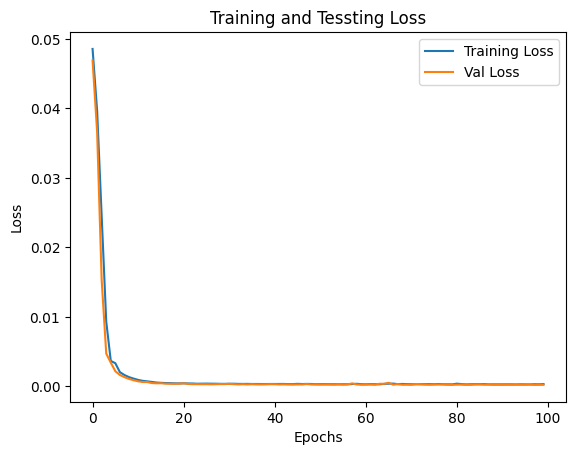

In [ ]:

from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
#from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
# Define CNN Model

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_length, 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
model.add(Dense((input_length), activation='sigmoid'))
#model.add(Dense(input_length))  # Output layer with 1 neuron for regression

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
denoised_data = model.predict(X_test)

print(denoised_data)
len(denoised_data)

model.save_weights("model.h5")
model.summary()



# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Tessting Loss')
plt.legend()
plt.show()


In [ ]:
denoised_data = model.predict(noisy_data)

22/22 [==============================] - 0s 7ms/step


In [ ]:
denoised_data
print(denoised_data)
len(denoised_data)

[[0.19348162 0.19490463 0.19680327 ... 0.2556378  0.256507   0.25611052]
 [0.23725662 0.23956688 0.24179827 ... 0.33469194 0.33441833 0.33526596]
 [0.1385028  0.13921718 0.14076829 ... 0.18065557 0.18138751 0.18131314]
 ...
 [0.28236085 0.28465524 0.28722623 ... 0.4567416  0.4568943  0.45745575]
 [0.25483358 0.25666308 0.25984398 ... 0.43736064 0.43745866 0.4383208 ]
 [0.23099019 0.23275743 0.23519415 ... 0.41381013 0.41389298 0.414495  ]]


674

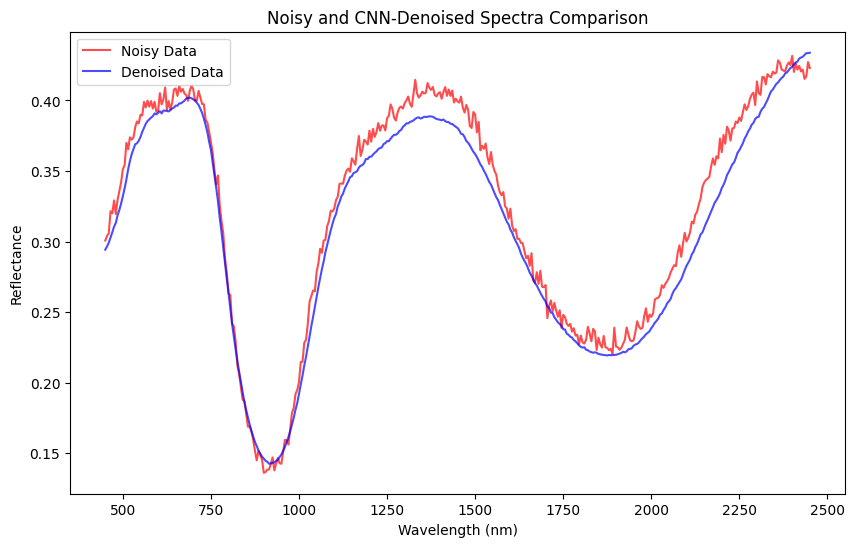

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(data['wavelengths'], original_data[index_test[0]], label='original Data', color='black', alpha=0.7 )
plt.plot(data['wavelengths'], noisy_data[index_test[100]].T, label='Noisy Data', color='red', alpha=0.7)
#plt.plot(data['wavelengths'], X_test[0],  label='Test noisy data', color='green', alpha=0.7)
plt.plot(data['wavelengths'], denoised_data[index_test[100]], label='Denoised Data', color='blue', alpha=0.7)

plt.legend()
plt.title('Noisy and CNN-Denoised Spectra Comparison')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

Median Filtering

In [ ]:
import numpy
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final



removed_noise = median_filter(noisy_data, 2)
removed_noise

array([[0.20669113, 0.20669113, 0.20756118, ..., 0.25736935, 0.25336192,
        0.        ],
       [0.25264039, 0.25264039, 0.25050302, ..., 0.3418718 , 0.33458804,
        0.        ],
       [0.13044882, 0.25264039, 0.25050302, ..., 0.3418718 , 0.33458804,
        0.        ],
       ...,
       [0.33523293, 0.39500843, 0.39500843, ..., 0.51700481, 0.51700481,
        0.        ],
       [0.29687761, 0.33358337, 0.33358337, ..., 0.46176749, 0.46176749,
        0.        ],
       [0.27066565, 0.29687761, 0.29738183, ..., 0.44713547, 0.44566682,
        0.        ]])

Gaussian SMoothing Filtering

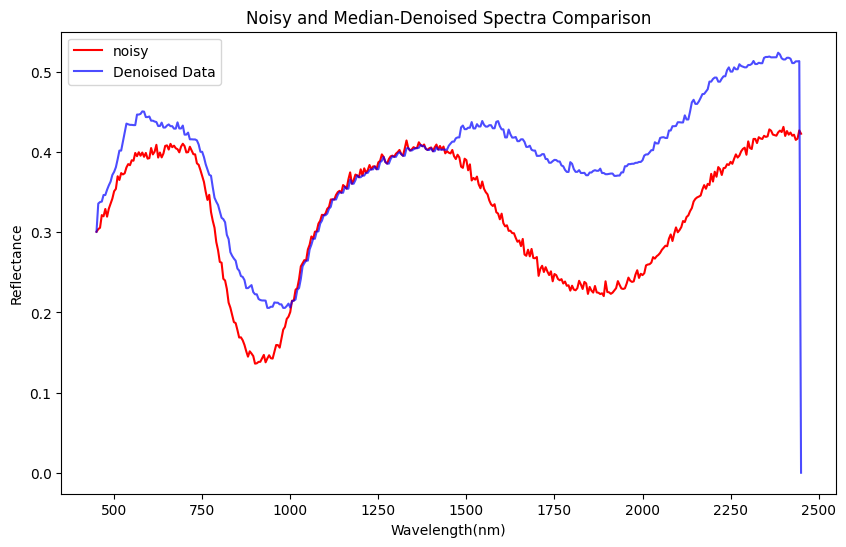

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(data['wavelengths'], original_data[[0]], label='original Data', color='black', alpha=0.7 )
#plt.plot(data['wavelengths'], noisy_data[[0]].T, label='Noisy Data', color='red', alpha=0.7)
#plt.plot(data['wavelengths'], X_test[0],  label='Test noisy data', color='green', alpha=0.7)
plt.plot(data['wavelengths'], noisy_data[index_test[100]], color='red', label='noisy')
#plt.plot(data['wavelengths'], original_data[index_test[63]], color='black', label='clean')
plt.plot(data['wavelengths'], removed_noise[index_test[100]], label='Denoised Data', color='blue', alpha=0.7)



plt.legend()
plt.title('Noisy and Median-Denoised Spectra Comparison')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Reflectance')
plt.show()

In [ ]:
import scipy.ndimage as ndimage

In [ ]:
img = ndimage.gaussian_filter(noisy_data, sigma=(0.4), order=0)

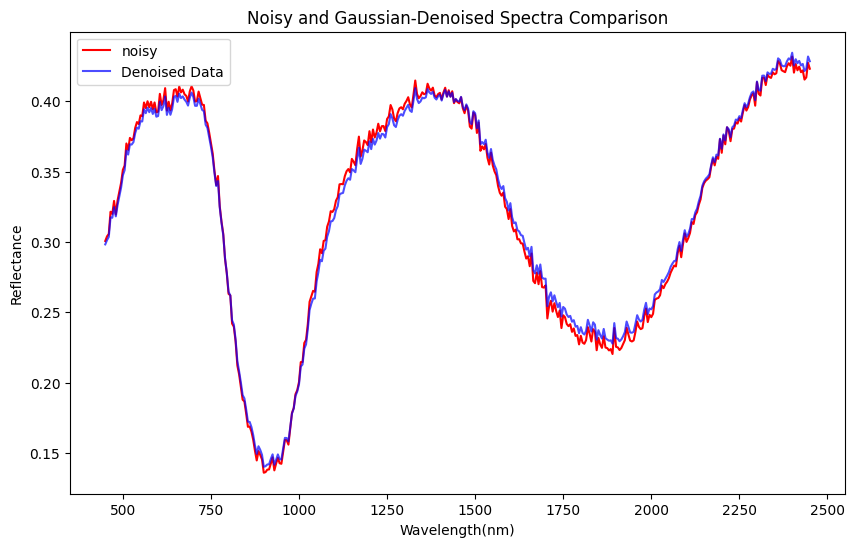

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['wavelengths'], noisy_data[index_test[100]].T, color='red', label='noisy')
#plt.plot(data['wavelengths'], lables[index_test[63]].T, color='black', label='clean')
plt.plot(data['wavelengths'], img[index_test[100]], label='Denoised Data', color='blue', alpha=0.7)
plt.legend()
plt.title('Noisy and Gaussian-Denoised Spectra Comparison')
plt.xlabel('Wavelength(nm)')
plt.ylabel('Reflectance')
plt.show()

Wavelength Denoising

In [ ]:
from  skimage.restoration._denoise import denoise_wavelet

In [ ]:
denoised_img = denoise_wavelet(noisy_data, sigma=0.5, rescale_sigma=True)

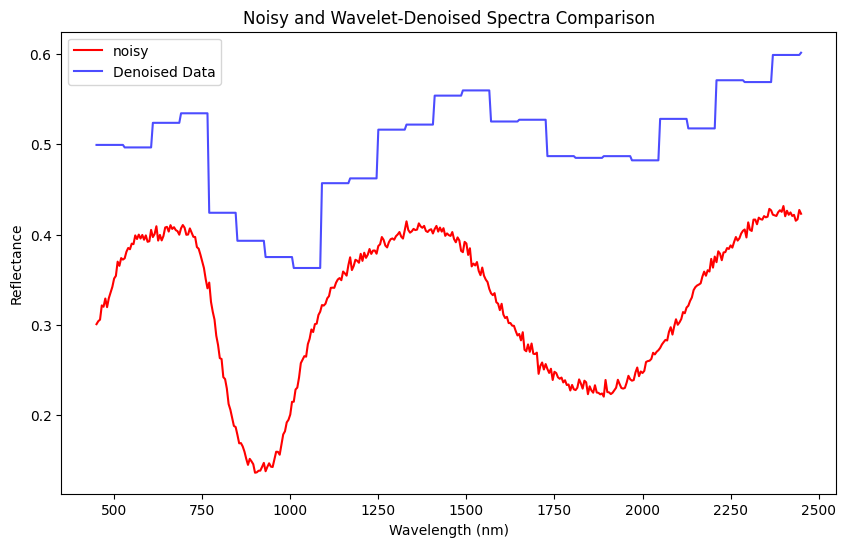

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['wavelengths'], noisy_data[index_test[100]].T, color='red', label='noisy')
#plt.plot(data['wavelengths'], lables[index_test[63]].T, color='black', label='clean')
plt.plot(data['wavelengths'], denoised_img[index_test[100]], label='Denoised Data', color='blue', alpha=0.7)
plt.legend()
plt.title('Noisy and Wavelet-Denoised Spectra Comparison')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()

Comparision

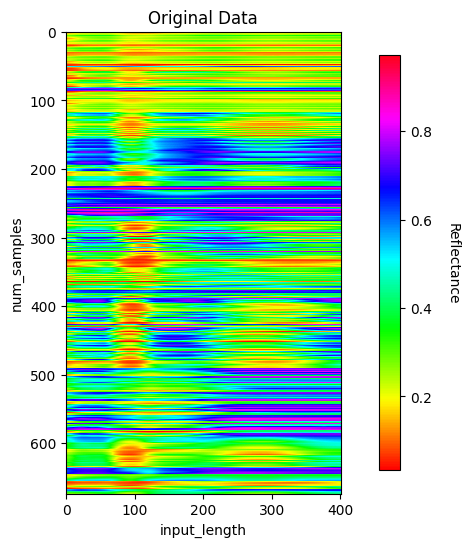

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is your 2D array of image data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the image
a = ax.imshow(original_data, cmap="hsv", interpolation="spline36")
ax.set_title("Original Data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('input_length')
plt.ylabel('num_samples')

plt.show()

In [ ]:
print(noisy_data)
len(noisy_data)

[[0.20669113 0.20756118 0.21077418 ... 0.25736935 0.25336192 0.25774205]
 [0.25264039 0.25494047 0.25050302 ... 0.34254802 0.33458804 0.33922539]
 [0.13044882 0.13609005 0.1321464  ... 0.15767636 0.16281343 0.16211754]
 ...
 [0.33523293 0.33358337 0.33557953 ... 0.46176749 0.46800003 0.46390454]
 [0.29687761 0.29953486 0.29738183 ... 0.44713547 0.44566682 0.44739971]
 [0.27066565 0.26621638 0.27218145 ... 0.42953367 0.42408176 0.43124161]]


674

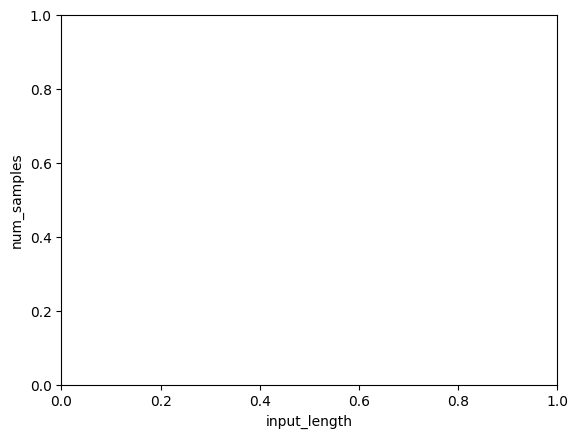

In [ ]:
# Plot the image
a = ax.imshow(noisy_data , cmap="hsv", interpolation="spline36")
ax.set_title("Noisy_data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('input_length')
plt.ylabel('num_samples')

plt.show()

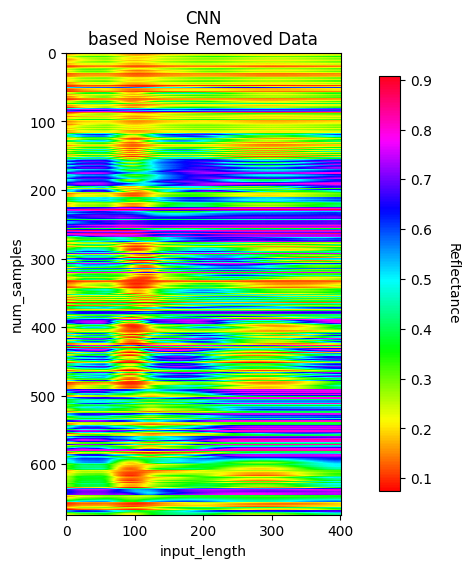

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is your 2D array of image data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the image
a = ax.imshow(denoised_data, cmap="hsv", interpolation="spline36")
ax.set_title("CNN\nbased Noise Removed Data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('input_length')
plt.ylabel('num_samples')

plt.show()

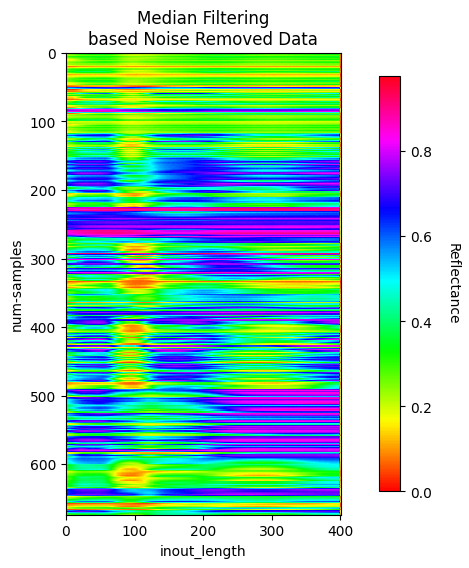

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is your 2D array of image data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the image
a = ax.imshow(removed_noise, cmap="hsv", interpolation="spline36")
ax.set_title("Median Filtering\nbased Noise Removed Data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('inout_length')
plt.ylabel('num-samples')

plt.show()

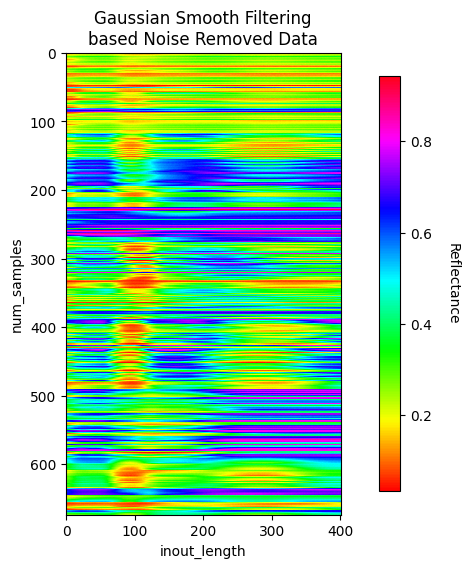

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is your 2D array of image data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the image
a = ax.imshow(img, cmap="hsv", interpolation="spline36")
ax.set_title("Gaussian Smooth Filtering\nbased Noise Removed Data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('inout_length')
plt.ylabel('num_samples')

plt.show()

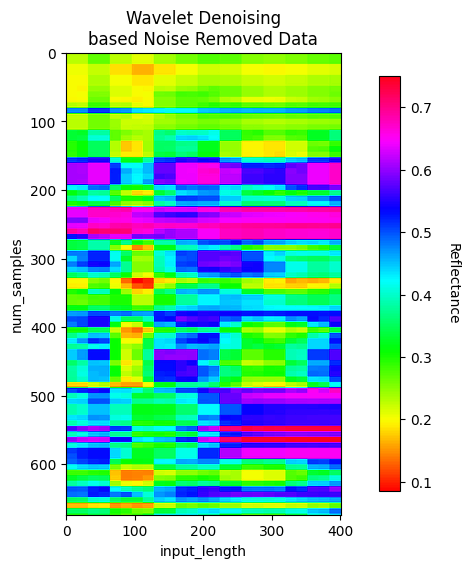

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` is your 2D array of image data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the image
a = ax.imshow(denoised_img, cmap="hsv", interpolation="spline36")
ax.set_title("Wavelet Denoising\nbased Noise Removed Data")

# Add color bar
cbar = fig.colorbar(a, ax=ax, shrink=0.9)  # Specify the axis for the color bar

# Add label to color bar
cbar.set_label('Reflectance', rotation=270, labelpad=20)  # Adjust label properties as needed

plt.xlabel('input_length')
plt.ylabel('num_samples')

plt.show()

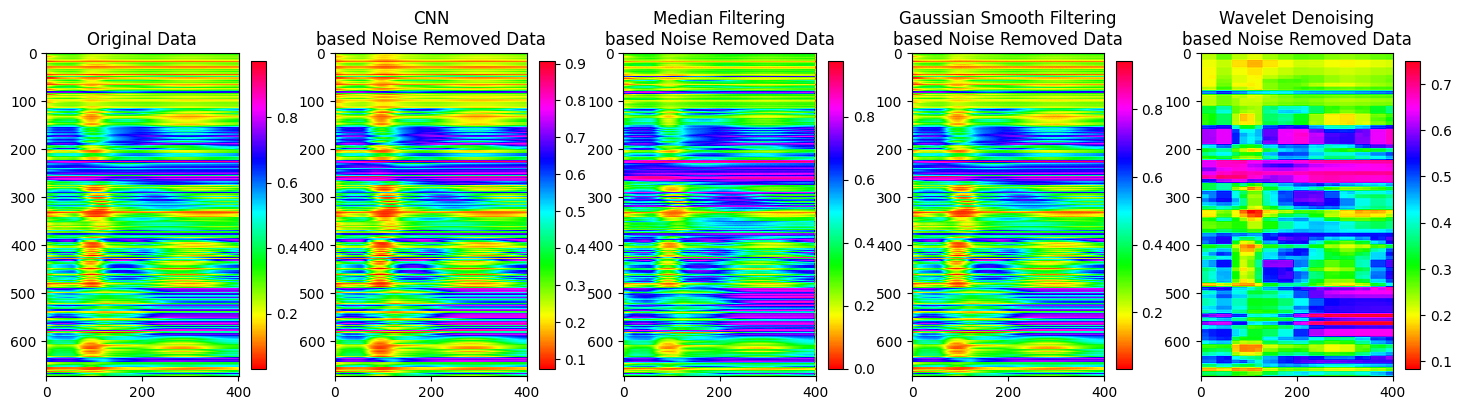

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(18,20))
a = ax[0].imshow(original_data,cmap="hsv",interpolation="spline36")
ax[0].set_title("Original Data")
fig.colorbar(a, shrink=0.2)

b = ax[1].imshow(denoised_data,cmap="hsv",interpolation="spline36")
ax[1].set_title("CNN\nbased Noise Removed Data")
fig.colorbar(b, shrink=0.2)

c = ax[2].imshow(removed_noise,cmap="hsv",interpolation="spline36")
ax[2].set_title("Median Filtering\nbased Noise Removed Data")
fig.colorbar(c, shrink=0.2)

d = ax[3].imshow(img,cmap="hsv",interpolation="spline36")
ax[3].set_title("Gaussian Smooth Filtering\nbased Noise Removed Data")
fig.colorbar(d, shrink=0.2)

e = ax[4].imshow(denoised_img,cmap="hsv",interpolation="spline36")
ax[4].set_title("Wavelet Denoising\nbased Noise Removed Data")
fig.colorbar(e, shrink=0.2)


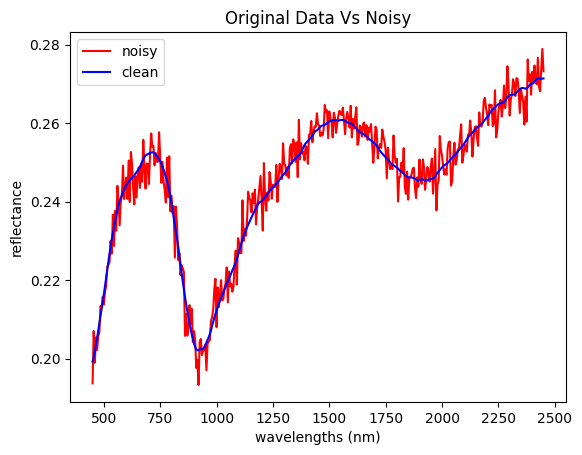

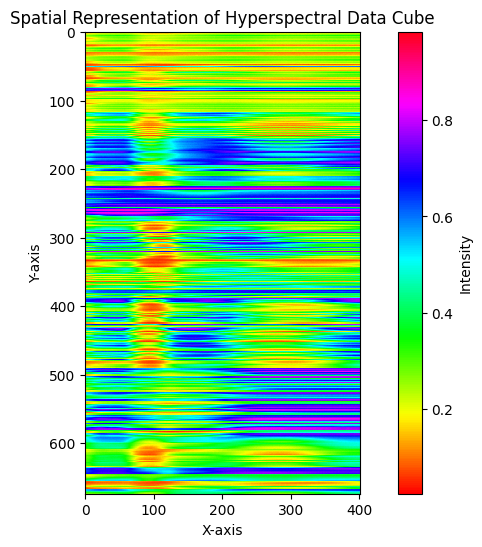

In [ ]:
# combining two noise
noisy_data = original_data + gaussian_noise + poisson_noise
# save the noisy data to a new .npz file
np.savez('noisy_data.npz', data_n=noisy_data)
lables = data['spectra']
plt.plot(data['wavelengths'], noisy_data[90].T, color='red', label='noisy')
plt.plot(data['wavelengths'], lables[90].T, color='blue', label='clean')
plt.xlabel('wavelengths (nm)')
plt.ylabel('reflectance')
plt.title('Original Data Vs Noisy')
plt.legend()
# Visualize the spatial representation of the hyperspectral data cube
plt.figure(figsize=(10, 6))
plt.imshow(noisy_data[:,:], cmap='hsv')  # Display the first spectral band as grayscale
plt.title('Spatial Representation of Hyperspectral Data Cube')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Intensity')
plt.show()


Shape of hyperspectral cube: (674, 1, 401)


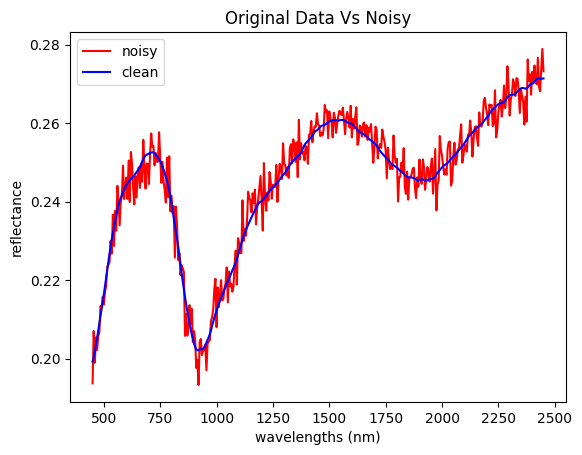

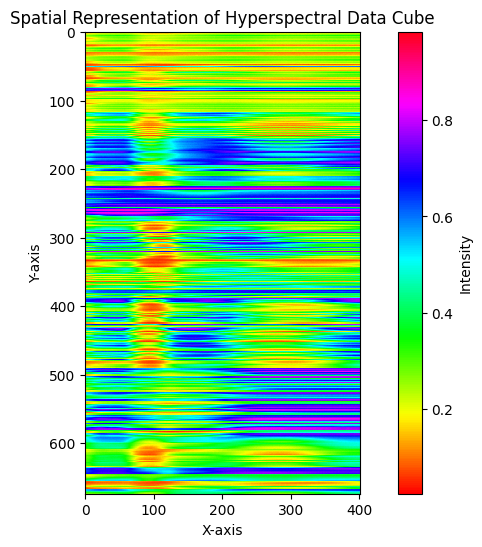

In [ ]:
# combining two noise
noisy_data = original_data + gaussian_noise + poisson_noise
# save the noisy data to a new .npz file
np.savez('noisy_data.npz', data_n=noisy_data)
lables = data['spectra']
plt.plot(data['wavelengths'], noisy_data[90].T, color='red', label='noisy')
plt.plot(data['wavelengths'], lables[90].T, color='blue', label='clean')
plt.xlabel('wavelengths (nm)')
plt.ylabel('reflectance')
plt.title('Original Data Vs Noisy')
plt.legend()
import numpy as np

# Assuming `noisy_data` is your 2D array with dimensions (num_samples, input_length)
# Assuming `num_samples` is the number of pixels and `input_length` is the number of spectral bands

# Create a data cube by reshaping the 2D data into a 3D array
hyperspectral_cube = np.reshape(noisy_data, (num_samples, 1, input_length))

# Print shape of the hyperspectral cube
print("Shape of hyperspectral cube:", hyperspectral_cube.shape)
# Output: Shape of hyperspectral cube: (674, 1, 401)

# Now you have a hyperspectral data cube with dimensions (num_samples, 1, input_length)
# You can access individual spectra using hyperspectral_cube[index_sample, 0, :]
# Visualize the spatial representation of the hyperspectral data cube
plt.figure(figsize=(10, 6))
plt.imshow(noisy_data[:, :], cmap='hsv')  # Display the first spectral band as grayscale
plt.title('Spatial Representation of Hyperspectral Data Cube')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Intensity')
plt.show()